# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [2]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [3]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [4]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [5]:
URL = 'https://api.hh.ru/vacancies'
professions = ["Криптограф", "Библитекарь", "Бармен", "Астролог", "Крупье"]

all_vacancies = []
vacancy = []

for profession in professions:
    page = 0
    params = {
        'text': profession,
        'area': 1,
        'per_page': 10
    }
    
    data = requests.get(URL, params).json()
    pages = data['pages']

    print(profession)

    for page in range(pages):
      sleep(0.1)
      params['page'] = page
      data = requests.get(URL, params).json()
      all_vacancies.extend(data['items'])
      vacancy.extend(data['items'])

    for j in range(len(vacancy)):
      print(vacancy[j])
    vacancy = []

Криптограф
{'id': '78108297', 'premium': False, 'name': 'Rust Developer', 'department': None, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': {'from': 60000, 'to': 400000, 'currency': 'RUR', 'gross': True}, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': None, 'response_url': None, 'sort_point_distance': None, 'published_at': '2023-05-14T23:07:19+0300', 'created_at': '2023-05-14T23:07:19+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=78108297', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/78108297?host=hh.ru', 'adv_response_url': None, 'alternate_url': 'https://hh.ru/vacancy/78108297', 'relations': [], 'employer': {'id': '9280258', 'name': 'Суровый байт', 'url': 'https://api.hh.ru/employers/9280258', 'alternate_url': 'https://hh.ru/employer/9280258', 'logo_urls': None, 'vacancies_url': 'https://api.hh.ru/vacancies?empl

(1 балл) Посчитайте сколько всего найдено вакансий:

In [6]:
print(f"Общее количество найденных вакансий: {len(all_vacancies)}")

Общее количество найденных вакансий: 1076


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [7]:
class Company:
    def __init__(self, name, latitude, longitude):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

    def __str__(self):
        return f"{self.name} ({self.latitude}, {self.longitude})"

    def __eq__(self, other):
        if isinstance(other, Company):
            return self.name == other.name and self.latitude == other.latitude and self.longitude == other.longitude
        return False

    def __hash__(self):
        return hash((self.name, self.latitude, self.longitude))


(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [8]:
company_coordinates = set()

for vacancy in all_vacancies:
    if "address" in vacancy and vacancy["address"] is not None and "employer" in vacancy:
        address = vacancy["address"]

        if "lat" in address and "lng" in address and address["lat"] is not None and address["lng"] is not None:
            company = Company(
                vacancy["employer"]["name"],
                address["lat"],
                address["lng"]
            )
            company_coordinates.add(company)

for company in list(company_coordinates):
    print(company)

IBIS Moscow Paveletskaya Hotel (гостиница ИБИС Москва Павелецкая) (55.723856, 37.634586)
Планета Железяка, компания (55.905366, 37.605023)
Marketplace (55.744596, 37.567545)
Секрет, Клуб (55.760702, 37.665677)
Чайхона №1 (55.751999, 37.585143)
Северо-Западный филиал АО Федеральная пассажирская компания (55.773449, 37.655329)
Аглезале (55.76443, 37.600738)
Alex&Milana (55.811513, 37.624723)
Бар тайм МСК (55.762166, 37.613063)
Safmar Hotels (55.768709, 37.599911)
Буонамичи (55.784258, 37.468398)
Арена НН (55.762996, 37.432978)
ОРГАНИК ГОЛЬФ (55.698203, 37.394395)
Ресторан Панорама (55.785235, 37.004661)
Ресторан Жигули (55.752217, 37.595132)
Хлебный пир (55.645471, 37.484586)
СБЕР (55.740421, 37.532071)
Бабиндвор (56.108917755473385, 36.98252761376854)
СИМПЛЕКС (55.79847, 37.729862)
АВРОРА (55.755241, 37.56158)
Косспир Прод (55.76598649758261, 37.63219540798532)
Novotel Adagio Ibis Moscow Kievskaya (55.743431, 37.562524)
МРУ Росалкогольрегулирования по Центральному федеральному округу (5

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [9]:
coordinates_count = 0

for vacancy in all_vacancies:
    if "address" in vacancy and vacancy["address"] is not None:
        address = vacancy["address"]

        if "lat" in address and "lng" in address and address["lat"] is not None and address["lng"] is not None:
            coordinates_count += 1

print(f"Количество вакансий с заданными координатами: {coordinates_count}")

Количество вакансий с заданными координатами: 739


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [10]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

moscow_center_lat = 55.753215
moscow_center_lng = 37.622504
mkad_radius = 17

vacancies_within_mkad = []

for vacancy in all_vacancies:
    if "address" in vacancy and vacancy["address"] is not None:
        address = vacancy["address"]

        if "lat" in address and "lng" in address and address["lat"] is not None and address["lng"] is not None:
            distance = haversine_distance(moscow_center_lat, moscow_center_lng, address["lat"], address["lng"])

            if distance <= mkad_radius:
                vacancies_within_mkad.append(vacancy)

print(f"Количество вакансий в пределах МКАД: {len(vacancies_within_mkad)}")

Количество вакансий в пределах МКАД: 643


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

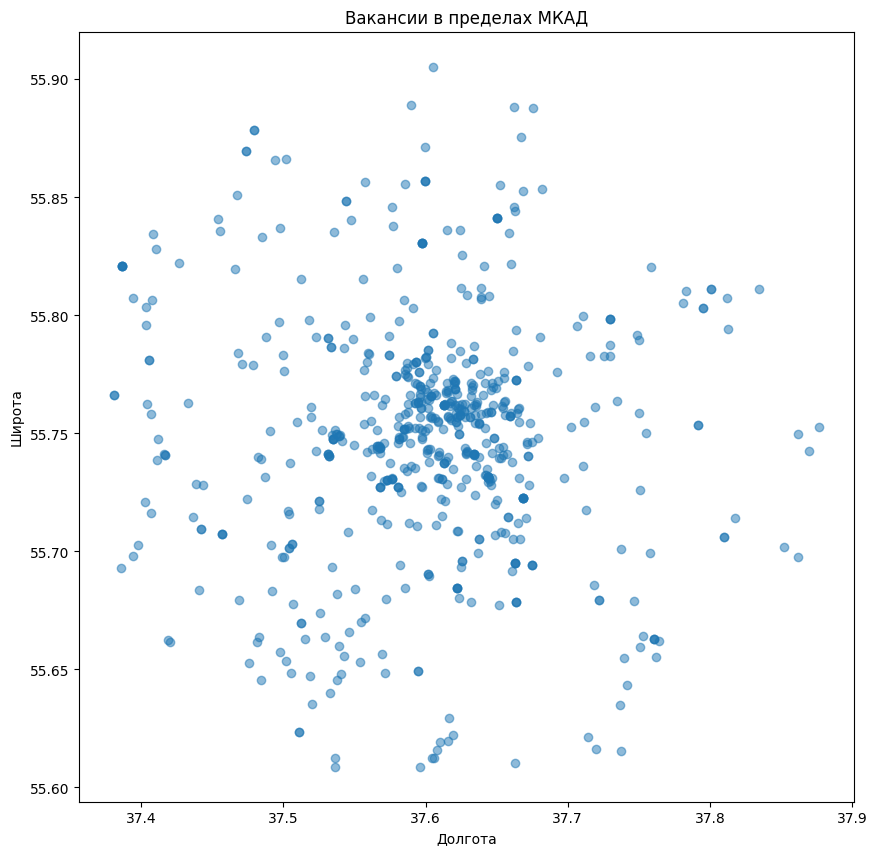

In [11]:
latitudes = [vacancy["address"]["lat"] for vacancy in vacancies_within_mkad]
longitudes = [vacancy["address"]["lng"] for vacancy in vacancies_within_mkad]


plt.figure(figsize=(10, 10))
plt.scatter(longitudes, latitudes, alpha=0.5)
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title("Вакансии в пределах МКАД")
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

По графику видно, что подавляющее большинство вакансий находится в пределах МКАД. Основная масса сосредоточена ближе к центру Москвы. Спрос на выбранные вакансии крайне низок (исходя из колличества результатов)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [12]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 159MB/s]


Создадим DataFrame:

In [13]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [14]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [15]:
num_diamonds = len(diamonds)
print(f"Количество бриллиантов в датасете: {num_diamonds}")

Количество бриллиантов в датасете: 219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [16]:
max_price_idx = diamonds['total_sales_price'].idxmax()
max_price = diamonds['total_sales_price'].max()

min_price_idx = diamonds['total_sales_price'].idxmin()
min_price = diamonds['total_sales_price'].min()

print(f"{max_price_idx} - {max_price}")
print(f"{min_price_idx} - {min_price}")

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [17]:
blank_cnt = diamonds[diamonds.isin(["unknown", "None"])].count().sum()

print(f"Итоговое количество пропусков: {blank_cnt}")

Итоговое количество пропусков: 1891168


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [18]:
null_columns = diamonds.isnull().any()

unknown_columns = (diamonds == 'unknown').any()

missing_value_columns = null_columns | unknown_columns

for el in missing_value_columns[missing_value_columns].index.tolist():
  print(el)

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [19]:
filtered_columns = diamonds.filter(regex='^(fancy_color_|fluor_)')

num_filtered_columns = len(filtered_columns.columns)
print(f"Количество столбцов, начинающихся с 'fancy_color_' или 'fluor_': {num_filtered_columns}")

Количество столбцов, начинающихся с 'fancy_color_' или 'fluor_': 6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [20]:
def is_informative(value):
    return value != 'unknown' and value is not None

informative_values = filtered_columns.applymap(is_informative)

num_informative_values = informative_values.sum().sum()

print(f"Количество информативных значений: {num_informative_values}")

Количество информативных значений: 256727


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [21]:
filtered_columns = diamonds.filter(regex='^(fancy_color_|fluor_)')

diamonds.drop(filtered_columns.columns, axis=1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [22]:
culet_columns = diamonds.filter(regex='^culet_')

diamonds.drop(culet_columns.columns, axis=1, inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [23]:
total_value = diamonds['total_sales_price'].sum()

total_value_thousands = total_value / 1000

print(f"Стоимость сейфа с бриллиантами: {total_value_thousands:.2f} тысяч долларов")

Стоимость сейфа с бриллиантами: 1517721.99 тысяч долларов


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [24]:
even_index_rows = diamonds.iloc[::2]

even_index_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [25]:
rows_index_multiple_six = diamonds.iloc[::6]

rows_index_multiple_six

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [26]:
categorical_features = diamonds.select_dtypes(include='object')

categorical_features

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [27]:
price_clm = np.array(diamonds['total_sales_price'])
price_clm = np.expand_dims(price_clm, axis=1)

matrix = np.dot(price_clm[0:10], price_clm.T)

print(matrix)

[[    40000     40000     40000 ... 263099200 270000000 289976200]
 [    40000     40000     40000 ... 263099200 270000000 289976200]
 [    40000     40000     40000 ... 263099200 270000000 289976200]
 ...
 [    40000     40000     40000 ... 263099200 270000000 289976200]
 [    40000     40000     40000 ... 263099200 270000000 289976200]
 [    40000     40000     40000 ... 263099200 270000000 289976200]]


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

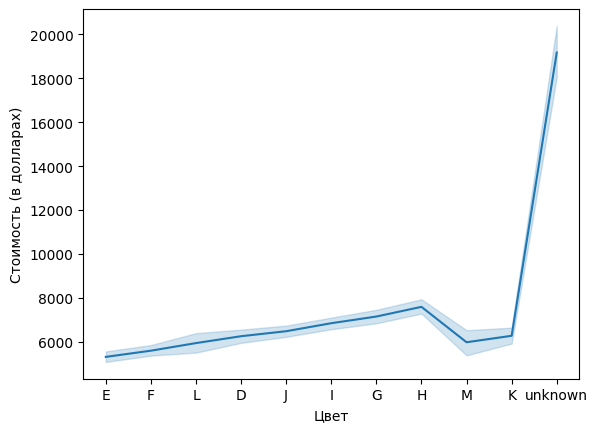

In [28]:
diamonds_cleaned = diamonds.dropna(subset=["color", "total_sales_price"])

sns.lineplot(
    x="color",
    y="total_sales_price",
    data=diamonds_cleaned
)

plt.rcParams['font.family'] = 'DejaVu Sans'

plt.xlabel('Цвет')
plt.ylabel('Стоимость (в долларах)')

plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

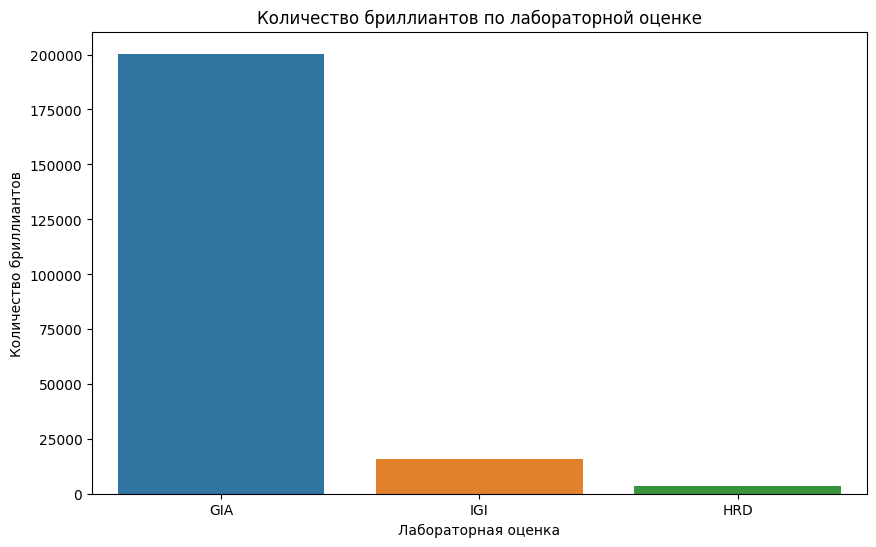

In [29]:
diamonds_clean = diamonds.dropna(subset=['lab'])

lab_counts = diamonds_clean['lab'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=lab_counts.index, y=lab_counts.values)

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Количество бриллиантов по лабораторной оценке')
plt.xlabel('Лабораторная оценка')
plt.ylabel('Количество бриллиантов')

plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

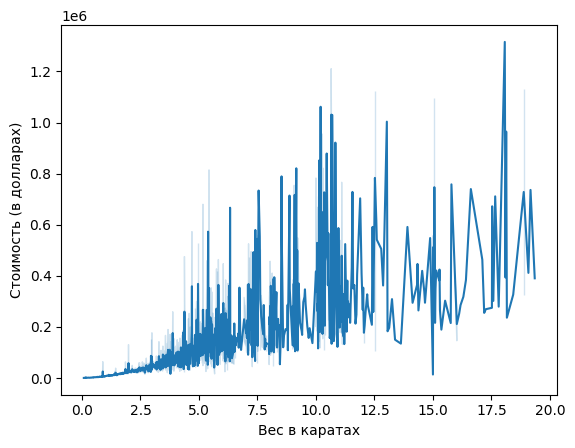

In [30]:
diamonds_cleaned = diamonds.dropna(subset=["carat_weight", "total_sales_price"])

sns.lineplot(
    x="carat_weight",
    y="total_sales_price",
    data=diamonds_cleaned
)

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.xlabel('Вес в каратах')
plt.ylabel('Стоимость (в долларах)')

plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

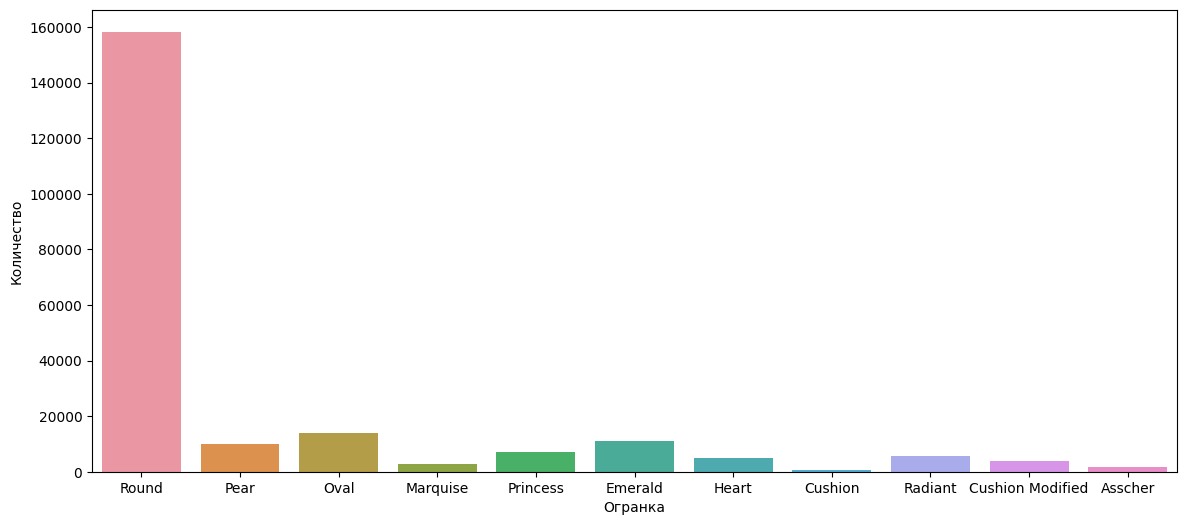

In [31]:
diamonds_cleaned = diamonds.dropna(subset=["cut"])

plt.figure(figsize=(14, 6))

sns.countplot(x="cut", data=diamonds_cleaned)

plt.xlabel('Огранка')
plt.ylabel('Количество')

plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Самые дорогие бриллианты цвета H (из тех, что удалось классифицировать). Unknown дороже всех (возможно, ввиду редкости).
По лабораторной оценке больше всего бриллиантов типа GIA. По графику "вес бриллианта - стоимость" видно, что чем больше вес бриллианта, тем больше его стоимость. Из последнего графика видно, что с большим отрывом лидирует круглая огранка, остальные используются гораздо реже.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [32]:
diamonds_model = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
diamonds_model.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [33]:
diamonds_model = diamonds_model.sample(frac=1, random_state=42)
diamonds_model.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
167888,7.64,5.67,3.60,5376
53087,4.37,4.40,2.71,940
168078,8.02,4.59,2.73,5400
194939,6.59,6.63,3.90,12893
58943,4.72,4.74,2.94,974
171027,5.47,5.47,3.96,6056
35317,4.27,4.30,2.58,832
114019,4.88,4.96,3.14,2184
20222,4.27,4.29,2.67,732
39535,4.26,4.30,2.64,880


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [34]:
diamonds_model["minkowski_sum"] = diamonds_model.apply(
lambda row: (row["meas_length"] ** 3 + row["meas_width"] ** 3 +
row["meas_depth"] ** 3) ** (1/3),
axis=1 )
diamonds_model.head(10)

,meas_length,meas_width,meas_depth,total_sales_price,minkowski_sum
167888,7.64,5.67,3.60,5376,8.771551
53087,4.37,4.40,2.71,940,5.734134
168078,8.02,4.59,2.73,5400,8.585746
194939,6.59,6.63,3.90,12893,8.604002
58943,4.72,4.74,2.94,974,6.189008
171027,5.47,5.47,3.96,6056,7.302606
35317,4.27,4.30,2.58,832,5.588486
114019,4.88,4.96,3.14,2184,6.456893
20222,4.27,4.29,2.67,732,5.602404
39535,4.26,4.30,2.64,880,5.595740


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [35]:
diamonds_final = diamonds_model[['minkowski_sum', 'total_sales_price']]
diamonds_final.head(10)

,minkowski_sum,total_sales_price
167888,8.771551,5376
53087,5.734134,940
168078,8.585746,5400
194939,8.604002,12893
58943,6.189008,974
171027,7.302606,6056
35317,5.588486,832
114019,6.456893,2184
20222,5.602404,732
39535,5.595740,880


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [36]:
X = diamonds_final['minkowski_sum'].values.reshape(-1, 1)
y = diamonds_final['total_sales_price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

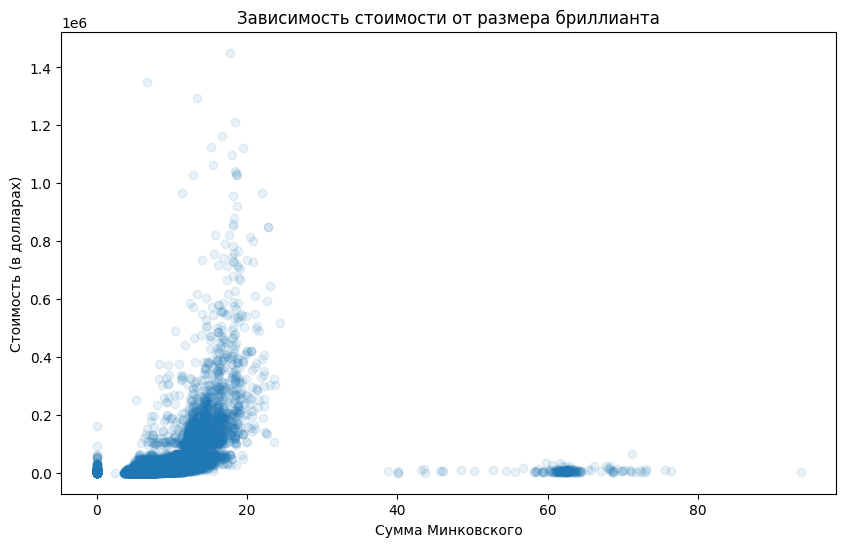

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.1)
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость (в долларах)')
plt.title('Зависимость стоимости от размера бриллианта')
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

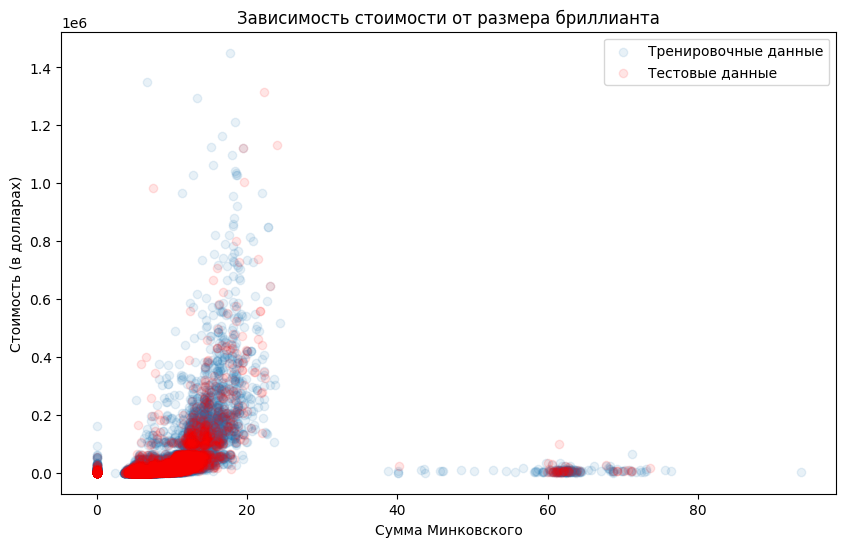

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.1, label='Тренировочные данные')
plt.scatter(X_test, y_test, alpha=0.1, color='red', label='Тестовые данные')
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость (в долларах)')
plt.title('Зависимость стоимости от размера бриллианта')
plt.legend()
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [39]:
nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_train)

distances, indices = nn.kneighbors(X_test)

print(distances)

[[0.00000000e+00]
 [2.14911317e-05]
 [1.99515248e-05]
 ...
 [0.00000000e+00]
 [1.62850521e-03]
 [0.00000000e+00]]


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [40]:
nearest_neighbors_prices = y_train[indices.flatten()]

price_diff_percentage = abs((y_test - nearest_neighbors_prices) / y_test) * 100

print(price_diff_percentage)

[24.63768116 34.05017921 42.71457086 ...  0.69444444 16.00981836
  2.75423729]


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [41]:
categorical_features = diamonds[['color', 'cut']]

encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = encoder.fit_transform(categorical_features)
print(categorical_encoded)

[[0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки: ", X_train.shape)
print("Размер тестовой выборки: ", X_test.shape)

Размер обучающей выборки:  (175762, 1)
Размер тестовой выборки:  (43941, 1)


(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [43]:
tree_regressor = DecisionTreeRegressor(random_state=42)

tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [44]:
y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 511591774.1474045


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Дискретные признаки лучше, поскольку гораздо легче обрабатываются. В общем случае лучше те, разброс в которых не сильно большой. 